Distribution of Jupiter ScWs

<Figure size 1000x600 with 0 Axes>

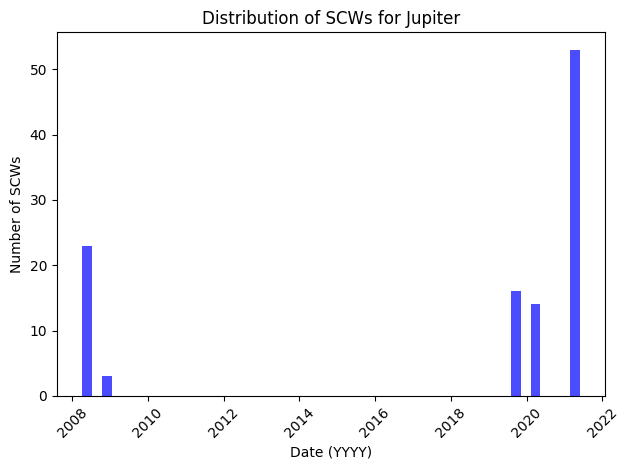

<Figure size 1000x600 with 0 Axes>

In [29]:
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.time import Time

scwdates = []

for file in os.listdir('../data/Jupiter/15-30keV/Images/'):
    if file.endswith('.fits'):
        with fits.open(os.path.join('../data/Jupiter/15-30keV/Images/', file)) as hdul:
            scwdates.append(hdul[2].header['DATE-OBS'])

scwdates = [Time(date, format='isot').datetime for date in scwdates]

plt.figure()
plt.hist(scwdates, bins=50, color='blue', alpha=0.7)
plt.xlabel('Date (YYYY)')
plt.ylabel('Number of SCWs')
plt.title('Distribution of SCWs for Jupiter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.figure(figsize=(10, 6))


From the FITS files

In [7]:
import importlib
utils = importlib.import_module('utils')
importlib.reload(utils)
from utils import *

In [10]:
# ISGRI: 15 - 30 keV
cr1, vr1, sg1, xp1, acr1, avr1, cr1_cpsf, cr1_psf, err1_cpsf, err1_psf, date1, offset1 = loadJupiterIMG()
lc1, lc1_err, lc1_date = loadJupiterLC()

Do some plotting

Max value of cr1: 4.473186016082764
Index of max value of cr1: 67
File name of max value of cr1: ../data/JupiterIMG_FITS_15_30/224700280010.001mosaic.fits
Date of max value of cr1: 2008-04-03 23:55:27


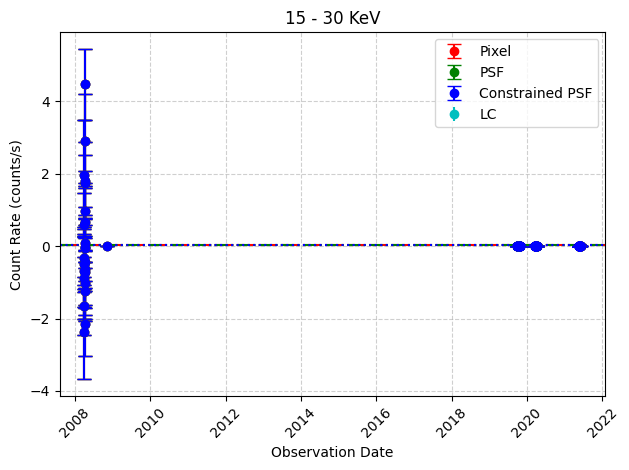

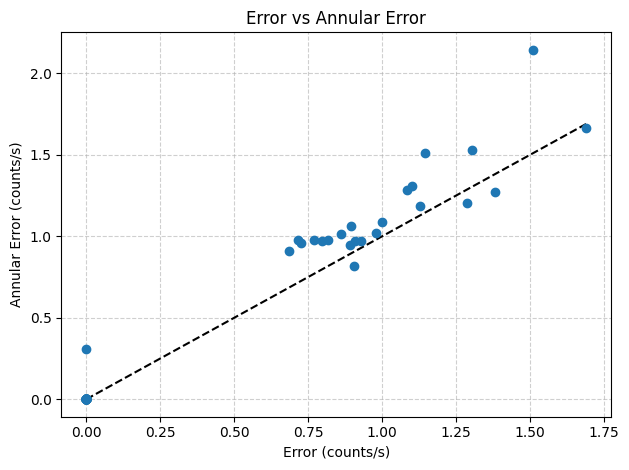

In [11]:
import matplotlib.pyplot as plt

img_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date1]
lc_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in lc1_date]

# Calculate averages and standard deviations
avg_cr1 = np.mean(cr1)
std_cr1 = np.std(cr1)
avg_psf1 = np.mean(cr1_psf)
std_psf1 = np.std(cr1_psf)
avg_cpsf1 = np.mean(cr1_cpsf)
std_cpsf1 = np.std(cr1_cpsf)

avg_lc1 = np.mean(lc1)
std_lc1 = np.std(lc1)

# Max value
print("Max value of cr1:", np.max(cr1))
print("Index of max value of cr1:", np.argmax(cr1))
files = glob.glob(f"../data/JupiterIMG_FITS_15_30/*")
max_file = files[np.argmax(cr1)]
print("File name of max value of cr1:", max_file)
print("Date of max value of cr1:", img_times1[np.argmax(cr1)])

# Plot count rate over time with errorbars and std region
plt.figure()

plt.errorbar(img_times1, cr1, yerr=np.sqrt(vr1), color='r', fmt='o', capsize=5, label='Pixel')
plt.errorbar(img_times1, cr1_psf, yerr=np.sqrt(vr1), color='g', fmt='o', capsize=5, label='PSF')
plt.errorbar(img_times1, cr1_cpsf, yerr=np.sqrt(vr1), color='b', fmt='o', capsize=5, label='Constrained PSF')
plt.errorbar(lc_times1, lc1, yerr=lc1_err, color='c', fmt='o', capsize=5, label='LC')

plt.axhline(avg_cr1, color='r', linestyle='--')
plt.axhline(avg_psf1, color='g', linestyle='-.')
plt.axhline(avg_cpsf1, color='b', linestyle=':')
plt.axhline(avg_lc1, color='c', linestyle='-.')

plt.xlabel("Observation Date")
plt.ylabel("Count Rate (counts/s)")
plt.title("15 - 30 KeV")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()


# Plot error vs annular error
plt.figure()

# straight line
x = np.linspace(0, np.max(np.sqrt(vr1)), 100)
y = x
plt.plot(x, y, color='k', linestyle='--', label='y=x')

plt.errorbar(np.sqrt(vr1), np.sqrt(avr1), fmt='o', capsize=5)

plt.xlabel("Error (counts/s)")
plt.ylabel("Annular Error (counts/s)")
plt.title("Error vs Annular Error")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


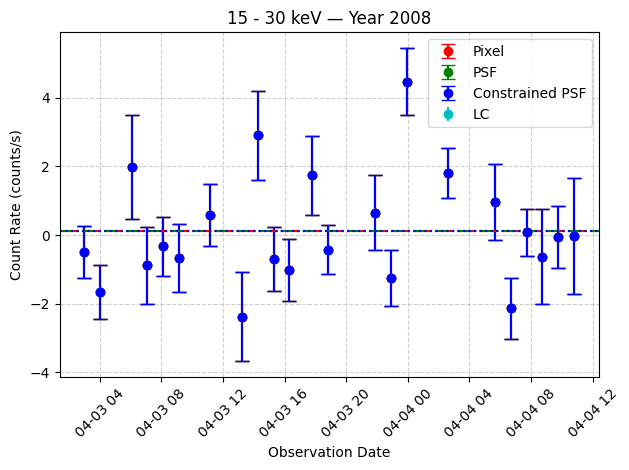

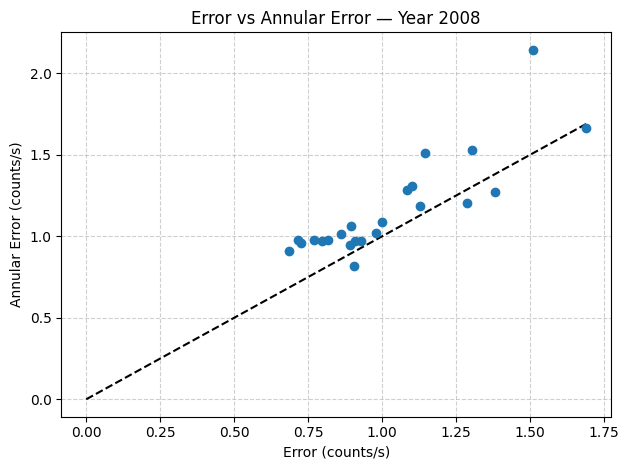

In [13]:

# Convert strings to datetime
img_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date1]
lc_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in lc1_date]

# Filter data for year 2008
img_filter = [i.year == 2008 and i.month == 4 for i in img_times1]
lc_filter = [i.year == 2008 and i.month == 4 for i in lc_times1]

# Apply filter to all relevant arrays
img_times1_2008 = [t for t, keep in zip(img_times1, img_filter) if keep]
cr1_2008 = [v for v, keep in zip(cr1, img_filter) if keep]
cr1_psf_2008 = [v for v, keep in zip(cr1_psf, img_filter) if keep]
cr1_cpsf_2008 = [v for v, keep in zip(cr1_cpsf, img_filter) if keep]
vr1_2008 = [v for v, keep in zip(vr1, img_filter) if keep]
avr1_2008 = [v for v, keep in zip(avr1, img_filter) if keep]

lc_times1_2008 = [t for t, keep in zip(lc_times1, lc_filter) if keep]
lc1_2008 = [v for v, keep in zip(lc1, lc_filter) if keep]
lc1_err_2008 = [v for v, keep in zip(lc1_err, lc_filter) if keep]

# Calculate averages
avg_cr1 = np.mean(cr1_2008)
avg_psf1 = np.mean(cr1_psf_2008)
avg_cpsf1 = np.mean(cr1_cpsf_2008)
avg_lc1 = np.mean(lc1_2008)

# Plot count rate over time with errorbars and std region
plt.figure()
plt.errorbar(img_times1_2008, cr1_2008, yerr=np.sqrt(vr1_2008), color='r', fmt='o', capsize=5, label='Pixel')
plt.errorbar(img_times1_2008, cr1_psf_2008, yerr=np.sqrt(vr1_2008), color='g', fmt='o', capsize=5, label='PSF')
plt.errorbar(img_times1_2008, cr1_cpsf_2008, yerr=np.sqrt(vr1_2008), color='b', fmt='o', capsize=5, label='Constrained PSF')
plt.errorbar(lc_times1_2008, lc1_2008, yerr=lc1_err_2008, color='c', fmt='o', capsize=5, label='LC')

plt.axhline(avg_cr1, color='r', linestyle='--')
plt.axhline(avg_psf1, color='g', linestyle='-.')
plt.axhline(avg_cpsf1, color='b', linestyle=':')
plt.axhline(avg_lc1, color='c', linestyle='-.')

plt.xlabel("Observation Date")
plt.ylabel("Count Rate (counts/s)")
plt.title("15 - 30 keV — Year 2008")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()

# Plot error vs annular error
plt.figure()

x = np.linspace(0, np.max(np.sqrt(vr1_2008)), 100)
plt.plot(x, x, color='k', linestyle='--', label='y = x')

plt.errorbar(np.sqrt(vr1_2008), np.sqrt(avr1_2008), fmt='o', capsize=5)

plt.xlabel("Error (counts/s)")
plt.ylabel("Annular Error (counts/s)")
plt.title("Error vs Annular Error — Year 2008")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
